NameError: name 'sklearn' is not defined

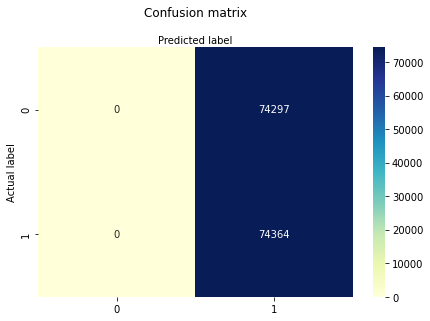

In [5]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#col_names = ['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'category', 'amount', 'fraud', 'NoOfFraudulentTransactions', 'AvgAmount']
col_names = ['amount', 'fraud', 'NoOfFraudulentTransactions', 'AvgAmount']
#load dataset
transactions = pd.read_csv("payments2.csv", header=0, names=col_names)

transactions.head()

#splitting dataset into features and target variables
feature_cols = ['amount', 'NoOfFraudulentTransactions', 'AvgAmount'] #['step', 'amount', 'gender', 'zipcodeOri', 'merchant', 'zipMerchant', 'amount', 'NoOfFraudulentTransactions', 'AvgAmount']
X = transactions[feature_cols] #features
y = transactions['fraud']#Target Variable

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

#instantiating model 
logreg = LogisticRegression()

#fit model with data
logreg.fit(X_train, y_train)

y_pred=logreg.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

%matplotlib inline
class_names=['Not Fraud', 'Fraud'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))